<a href="https://colab.research.google.com/github/mmeierer/MLP---TensorFlow-vs-PyTorch/blob/main/mlp_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification using an MLP with TensorFlow

## 1. Import & Preprocessing

### a) Importing modules

In [1]:
# Load required packages - data handling & plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load required packages - deep learning 
import tensorflow as tf
from tensorflow import keras

### b) Importing data

In [2]:
train_data = pd.read_csv('https://github.com/mmeierer/MLP---TensorFlow-vs-PyTorch/raw/main/train.csv')
test_data = pd.read_csv('https://github.com/mmeierer/MLP---TensorFlow-vs-PyTorch/raw/main/test.csv')

In [3]:
train_data.head()

,CustomerId,Churned,FrequentBuyerClass,Sex,Age,NrSiblingsSpouses,NrParentsChildren
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [4]:
test_data.head()

,CustomerId,FrequentBuyerClass,Sex,Age,NrSiblingsSpouses,NrParentsChildren
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


### c) Data preparation

In [5]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

In [6]:
train_data = train_data[train_data.columns[-6:]]
test_data = test_data[test_data.columns[-5:]]

In [7]:
dummy_columns = ["FrequentBuyerClass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [8]:
train_data.head()

,Churned,Sex,Age,NrSiblingsSpouses,NrParentsChildren,FrequentBuyerClass_1,FrequentBuyerClass_2,FrequentBuyerClass_3
0,0,male,22.0,1,0,0,0,1
1,1,female,38.0,1,0,1,0,0
2,1,female,26.0,0,0,0,0,1
3,1,female,35.0,1,0,1,0,0
4,0,male,35.0,0,0,0,0,1


In [9]:
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Churned,Sex,Age,NrSiblingsSpouses,NrParentsChildren,FrequentBuyerClass_1,FrequentBuyerClass_2,FrequentBuyerClass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


In [10]:
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Churned,Sex,Age,NrSiblingsSpouses,NrParentsChildren,FrequentBuyerClass_1,FrequentBuyerClass_2,FrequentBuyerClass_3
0,0,1,0.271174,1,0,0,0,1
1,1,0,0.472229,1,0,1,0,0
2,1,0,0.321438,0,0,0,0,1
3,1,0,0.434531,1,0,1,0,0
4,0,1,0.434531,0,0,0,0,1


In [11]:
train_data.Age.fillna(train_data.Age.median(),inplace=True)
test_data.Age.fillna(test_data.Age.median(),inplace=True)

In [12]:
def split_valid_test_data(data, fraction=(0.2)):
    y_data = data["Churned"]

    x_data = data.drop(["Churned"], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=fraction)

    return x_train.values, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_valid_test_data(train_data)
print("x_train:{}, {}".format(x_train.shape, type(x_train)))
print("y_train:{}, {}".format(y_train.shape, type(y_train)))

print("x_test:{}, {}".format(x_test.shape, type(x_test)))
print("y_test:{}, {}".format(y_test.shape, type(y_test)))

x_train:(712, 7), <class 'numpy.ndarray'>
y_train:(712,), <class 'pandas.core.series.Series'>
x_test:(179, 7), <class 'pandas.core.frame.DataFrame'>
y_test:(179,), <class 'pandas.core.series.Series'>


In [13]:
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

## 2. Model specific data preparation

### a) Load the data

In [14]:
x_train_tf = tf.convert_to_tensor(x_train)
y_train_tf = tf.convert_to_tensor(y_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_test_tf = tf.convert_to_tensor(y_test)

### b) Tensor view of the data

In [15]:
x_train_tf[0]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([1.        , 0.67328474, 0.        , 1.        , 1.        ,
       0.        , 0.        ])>

In [16]:
y_train_tf[0]

<tf.Tensor: shape=(), dtype=int64, numpy=0>

## 3. Model definition

### a) Sequentially add layers

In [17]:
initializer = tf.random_uniform_initializer(
    minval=-1, maxval=1, seed=123)

In [18]:
model_tf = keras.models.Sequential([
     keras.layers.Dense(16, input_dim=x_train_tf.shape[1], activation='relu', kernel_initializer=initializer),
     keras.layers.Dense(32, activation='relu', kernel_initializer=initializer),
     keras.layers.Dense(1,activation='sigmoid', kernel_initializer=initializer)])

### b) Inspect the model

In [19]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


### c) Inspect the first hidden layer

In [20]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante, biases_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[0]

array([-0.04798412, -0.22223973, -0.9824271 , -0.57410717, -0.79084826,
       -0.6723347 , -0.54534245, -0.14903617,  0.22151732, -0.04990911,
        0.76847243,  0.8567488 , -0.19580126,  0.6683371 , -0.29299927,
       -0.13567281], dtype=float32)

In [21]:
weights_tf_ante.shape

(7, 16)

In [22]:
biases_tf_ante

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
biases_tf_ante.shape

(16,)

## 4. Loss & Optimizer

In [24]:
optimizer_tf = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
loss_fn_tf = keras.losses.BinaryCrossentropy()

test_loss = tf.keras.metrics.Mean(name='test_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

## 5. Training

### a) Training loop

In [25]:
def train_step_tf(model, optimizer, loss_fn, batch_size = 10):
  losses = []
  for beg_i in range(0, x_train_tf.shape[0], batch_size):
    x_train_batch_tf = x_train_tf[beg_i:beg_i + batch_size]
    y_train_batch_tf = y_train_tf[beg_i:beg_i + batch_size]

    with tf.GradientTape() as tape:
      y_pred_tf = model(x_train_batch_tf, training=True)
      loss = loss_fn(y_train_batch_tf, y_pred_tf)

    grads = tape.gradient(loss, model.trainable_weights)

    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    
    losses.append(loss)
    train_accuracy.update_state(y_train_batch_tf, y_pred_tf)
  return losses

In [26]:
def test_step_tf(model, optimizer, loss_fn, batch_size = 10):
  for beg_i in range(0, x_train_tf.shape[0], batch_size):
    x_test_batch_tf = x_train_tf[beg_i:beg_i + batch_size]
    y_test_batch_tf = y_train_tf[beg_i:beg_i + batch_size]
    y_pred_tf = model(x_test_batch_tf, training=False)
    loss = loss_fn(y_test_batch_tf, y_pred_tf)
    test_loss.update_state(loss)
    test_accuracy.update_state(y_test_batch_tf, y_pred_tf)


In [27]:
train_loss_tf = []
test_loss_tf = []

train_acc_tf = []
test_acc_tf = []

epochs = 200
for epoch in range(epochs):
  loss = train_step_tf(model_tf, optimizer_tf, loss_fn_tf)
  mean_loss_tf = float(tf.reduce_mean(loss))

  test_step_tf(model_tf, optimizer_tf, loss_fn_tf)

  template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}")
  print(template.format(epoch+1, mean_loss_tf, train_accuracy.result()*100, test_loss.result(), test_accuracy.result()*100))

  train_loss_tf.append(mean_loss_tf)
  test_loss_tf.append(test_loss.result())

  train_acc_tf.append(train_accuracy.result()*100)
  test_acc_tf.append(test_accuracy.result()*100)
  test_loss.reset_states()
  train_accuracy.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 1.375333547592163, Accuracy: 51.52777862548828, Test Loss: 0.8660668134689331, Test Accuracy: 65.83334350585938
Epoch 2, Loss: 0.7058120369911194, Accuracy: 69.02778625488281, Test Loss: 0.5957400798797607, Test Accuracy: 71.80555725097656
Epoch 3, Loss: 0.5502522587776184, Accuracy: 73.6111068725586, Test Loss: 0.5113005638122559, Test Accuracy: 76.24999237060547
Epoch 4, Loss: 0.4933280944824219, Accuracy: 77.91667175292969, Test Loss: 0.4746783673763275, Test Accuracy: 80.00001525878906
Epoch 5, Loss: 0.46984344720840454, Accuracy: 79.72222900390625, Test Loss: 0.45737946033477783, Test Accuracy: 81.11112213134766
Epoch 6, Loss: 0.45744186639785767, Accuracy: 80.5555648803711, Test Loss: 0.4471385180950165, Test Accuracy: 81.25001525878906
Epoch 7, Loss: 0.4487559497356415, Accuracy: 80.97222900390625, Test Loss: 0.4392627477645874, Test Accuracy: 81.11112213134766
Epoch 8, Loss: 0.4411599040031433, Accuracy: 81.11111450195312, Test Loss: 0.43165433406829834, Test Acc

### b) Training progress

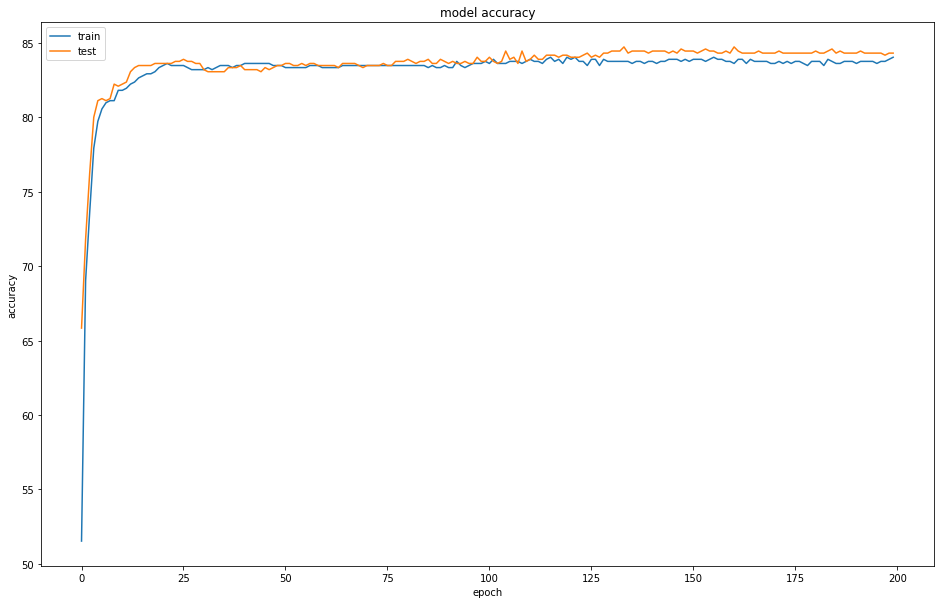

In [28]:
plt.figure(figsize=(16,10))
plt.plot(train_acc_tf)
plt.plot(test_acc_tf)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

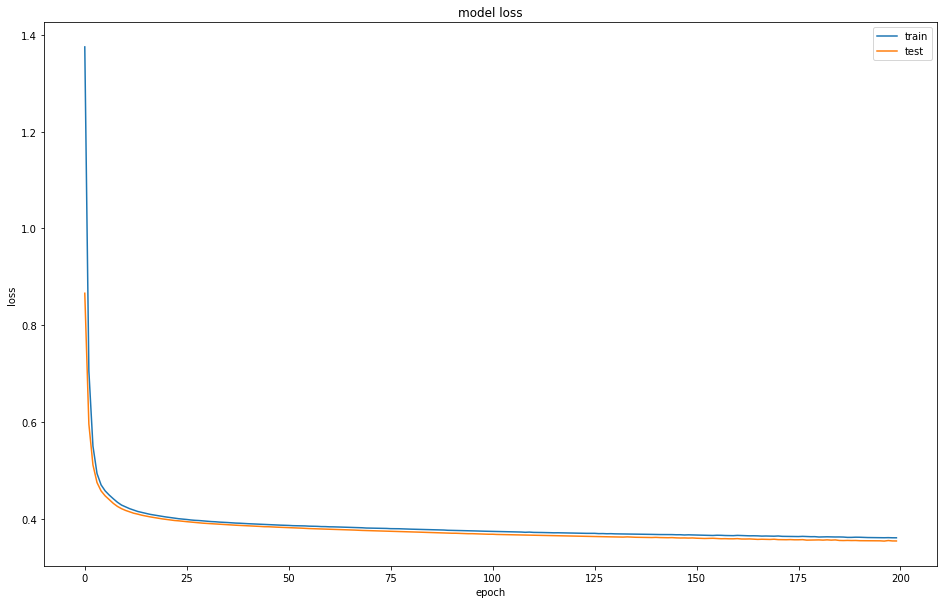

In [29]:
plt.figure(figsize=(16,10))
plt.plot(train_loss_tf)
plt.plot(test_loss_tf)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

### c) Inspect the first hidden layer after training

In [30]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post, biases_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[0]

array([-0.03100187,  0.10390734, -0.9824271 , -1.0130769 , -1.1558548 ,
       -0.9059025 , -0.4385782 ,  0.0925887 ,  0.20691301,  0.04884329,
        0.9695156 ,  0.7528774 , -0.39830452,  0.7438842 , -0.45683694,
       -0.44236523], dtype=float32)

In [31]:
biases_tf_post

array([-0.09746505,  0.14253229, -0.17178363,  0.13427304,  0.00762053,
       -0.1791243 , -0.08188608, -0.23662587, -0.03148441, -0.12480076,
       -0.01399057,  0.07438098,  0.02097086, -0.03737495,  0.2610188 ,
        0.18415031], dtype=float32)

## 6. Evaluation

In [32]:
y_pred_tf = (model_tf.predict(x_test) > 0.5).astype('int32')

In [33]:
accuracy_score(y_test,y_pred_tf)

0.7821229050279329